In [1]:
!pip install tensorflow opencv-python matplotlib


/content/drive/MyDrive/cnn/happy

/content/drive/MyDrive/cnn/sad

In [2]:
import tensorflow as tf
import os

2025-04-19 15:46:59.115144: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-19 15:46:59.139442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-19 15:46:59.515743: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

2025-04-19 15:47:00.756875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-19 15:47:00.760052: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
cpus


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
import cv2

In [8]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu,True)

In [12]:
import cv2
import imghdr

/tmp/ipykernel_13668/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [15]:
datadir = '/home/bflserver01/Documents/1stcnn/cnn/data'


In [16]:
os.listdir(datadir)

['happy', 'sad']

In [17]:
os.listdir(os.path.join(datadir,'happy'))

['Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x45.jpg',
 'image (9).jpeg',
 'Couple_Happy_money_062618.jpg',
 '2983960_stock-photo-happy-people.jpg',
 '151937742-happy-people-faces-collage-collection-of-different.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 'GettyImages-871518740.jpg',
 'people-happy-face-woman-icon-vector-13657660.jpg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'Happy People.jpg',
 'ef2ceeb132fff194db93a7c0585d857f.jpg',
 'image (15).jpeg',
 '613k1XcpYCL-_AC_UF894-1000_QL80_.jpg',
 'image (14).jpeg',
 'stock-photo-close-up-portrait-of-yong-woman-casual-portrait-.jpg',
 'successful-mature-man-smiling-looking-away-50397519.jpg',
 'physed-happiness-articleLarge.jpg',
 '9dfbe6c61ab733b86aa68c1fcc3173d4.jpg',
 'a-group-of-happy-people-at-sunset-on-the-nature-WBAH9W.jpg',
 'beauty-portrait-woman-beautiful-smile-fresh-face-smiling-hap.jpg',
 '2677889-face-portrait-smile-and-happy-asian-man-in-studio-is.jpg',
 'Happiest-person-in-the-world

In [18]:
print(len(os.listdir(os.path.join(datadir,'happy'))))
print(len(os.listdir(os.path.join(datadir,'sad'))))

170
127


In [19]:
img_ext = ['jpeg','jpg','bmp','png']

In [20]:
img = cv2.imread(os.path.join(datadir,'happy','image (7).jpeg'))
img

array([[[ 11,  13,  14],
        [ 11,  13,  14],
        [ 11,  13,  14],
        ...,
        [ 10,   9,  11],
        [ 10,   9,  11],
        [ 10,   9,  11]],

       [[ 34,  39,  42],
        [ 34,  39,  42],
        [ 34,  39,  42],
        ...,
        [ 33,  37,  42],
        [ 33,  37,  42],
        [ 33,  37,  42]],

       [[ 98, 109, 117],
        [ 98, 109, 117],
        [ 98, 109, 117],
        ...,
        [ 96, 112, 119],
        [ 96, 112, 119],
        [ 96, 112, 119]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [21]:
from matplotlib import pyplot as plt


In [22]:
import numpy as np

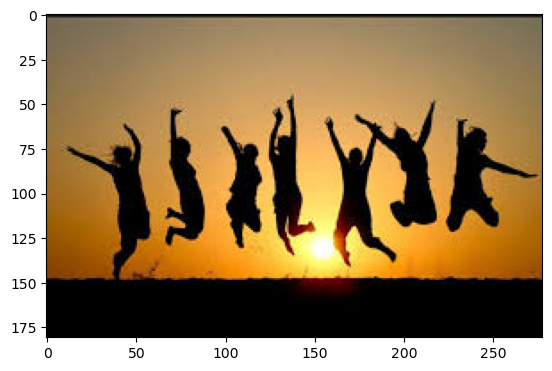

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
import os

# Set your image directory here
# datadir = '/your/image/folder'  # 🔁 Replace this with your actual path
removed_count = 0

for image_class in os.listdir(datadir):
  for image in os.listdir(os.path.join(datadir,image_class)):
        image_path=os.path.join(datadir,image_class,image)
        try:
            size_kb = os.path.getsize(image_path) / 1024  # size in KB
            if size_kb < 10:
                print(f"Removing {image_path} (size: {size_kb:.2f} KB)")
                os.remove(image_path)
                removed_count += 1
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print(f"\n✅ Total images removed (under 10KB): {removed_count}")


Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/image (9).jpeg (size: 6.19 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/image (15).jpeg (size: 5.99 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/image (14).jpeg (size: 3.94 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/AF2bZygIqxIydKGffMp74VxQiNUjW-ZoCSYLIVU5Ofv0Vljb7w-s32-c-mo.jpeg (size: 1.22 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/image (17).jpeg (size: 0.88 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/image (6).jpeg (size: 4.29 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/images (6).jpeg (size: 8.42 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/images (4).jpeg (size: 1.06 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/images (2).jpeg (size: 1.22 KB)
Removing /home/bflserver01/Documents/1stcnn/cnn/data/happy/image (18).jpeg (size: 5.21 KB)
Removing /home/bflserver01/Documents/1stcnn

In [25]:
removed_count

30

In [26]:
countI = 0
countex = 0
for image_class in os.listdir(datadir):
  for image in os.listdir(os.path.join(datadir,image_class)):
    image_path=os.path.join(datadir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_ext:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
        countex+=1
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      countI+=1
      # os.remove(image_path)


Image not in ext list /home/bflserver01/Documents/1stcnn/cnn/data/happy/Happy People.jpg
Image not in ext list /home/bflserver01/Documents/1stcnn/cnn/data/happy/happy-home.jpg
Image not in ext list /home/bflserver01/Documents/1stcnn/cnn/data/sad/article-2029228-01C3E98B000004B0-620_233x423.jpg
Image not in ext list /home/bflserver01/Documents/1stcnn/cnn/data/sad/sad-looking.jpg


In [27]:
print(countI)
print(countex)

0
4


In [28]:
data = tf.keras.utils.image_dataset_from_directory(datadir)

Found 263 files belonging to 2 classes.


In [29]:
data_iterator = data.as_numpy_iterator()

In [30]:
batch = data_iterator.next()

In [31]:
batch[1]

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

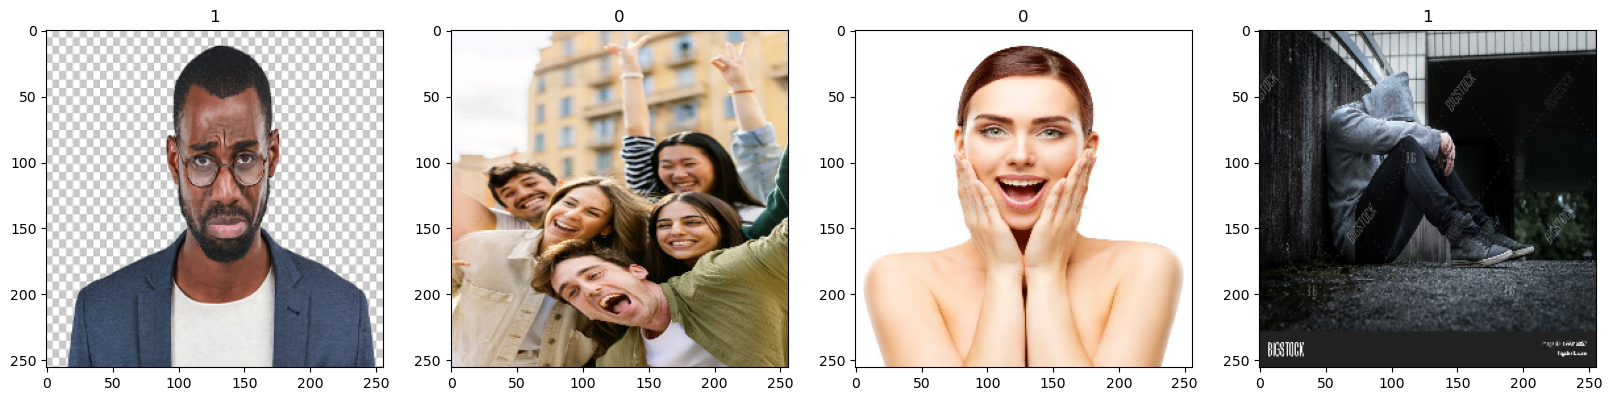

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


In [33]:
data = data.map(lambda x, y : (x/255, y))

In [34]:
scaled_iterator = data.as_numpy_iterator()

In [35]:
batch = scaled_iterator.next()


In [36]:
batch[0].max()

1.0

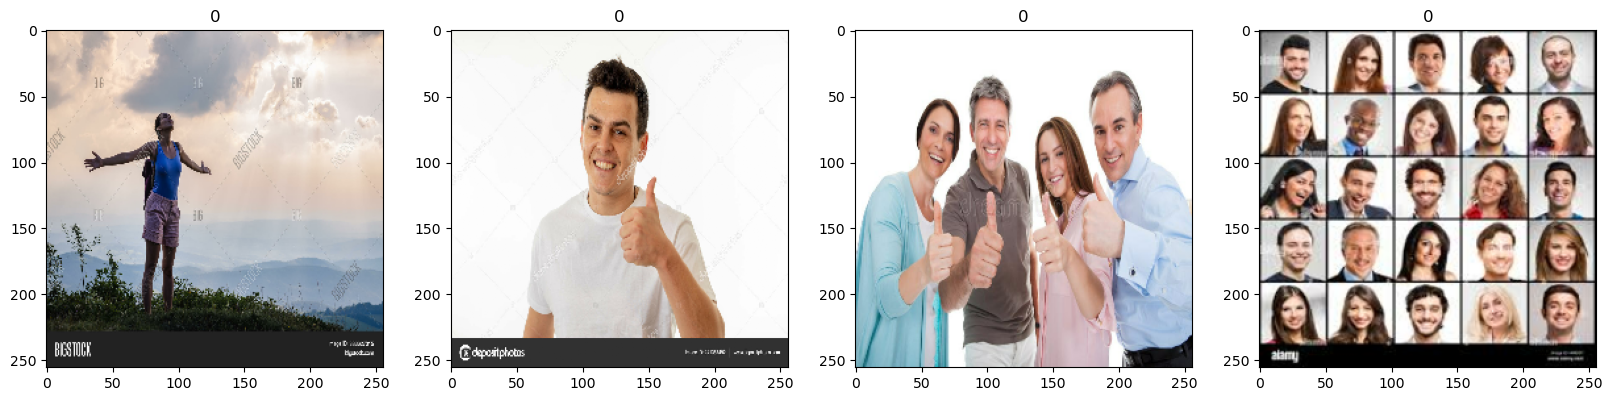

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])


In [38]:
len(data)

9

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size=(int(len(data)*.1))+1

In [40]:
train_size + val_size + test_size

9

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [42]:
len(train)+len(val)+len(test)

9

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(16, (3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/home/bflserver01/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [145]:
# model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [146]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [147]:
logdir='/home/bflserver01/Documents/1stcnn/cnn/logdir'

In [148]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [149]:
hist = model.fit(train, epochs=50,validation_data=val,callbacks=[tensorboard_callback])
#

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.9488 - loss: 0.1211 - val_accuracy: 0.9688 - val_loss: 0.1056
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9752 - loss: 0.0896 - val_accuracy: 0.9844 - val_loss: 0.0833
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.9824 - loss: 0.0966 - val_accuracy: 1.0000 - val_loss: 0.0359
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.9787 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.0238
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.9970 - loss: 0.0211 - val_accuracy: 0.9844 - val_loss: 0.0328
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9961 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.9787 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9935 - loss: 0.0222 - val_accuracy: 0.9844 - val_loss:

In [150]:
len(hist.history)


4

In [151]:
hist.history

{'accuracy': [0.9479166865348816,
  0.9635416865348816,
  0.984375,
  0.984375,
  0.9895833134651184,
  0.9895833134651184,
  0.984375,
  0.9895833134651184,
  0.9791666865348816,
  0.9947916865348816,
  0.9791666865348816,
  0.9895833134651184,
  0.9739583134651184,
  0.984375,
  0.9895833134651184,
  0.984375,
  0.984375,
  0.9791666865348816,
  0.9895833134651184,
  0.9791666865348816,
  0.984375,
  0.984375,
  0.9791666865348816,
  0.984375,
  0.9895833134651184,
  0.9739583134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  0.984375,
  0.984375,
  0.9791666865348816,
  0.984375,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  0.984375,
  0.984375,
  0.9895833134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.984375,
  0.984375,
  0.984375,
  0.984375,
  0.984375,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  0.9791666865348816],
 'loss': [0.1251089721918106,
  0.10307357460260391,
  0.0824531838297844,
  

<function matplotlib.pyplot.show(close=None, block=None)>

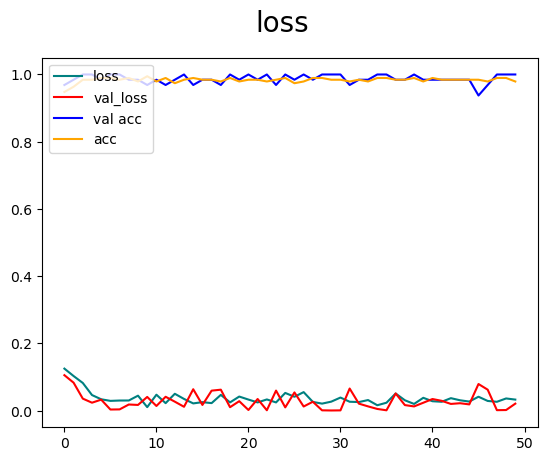

In [152]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
plt.plot(hist.history['val_accuracy'],color='blue',label='val acc')
plt.plot(hist.history['accuracy'],color='orange',label='acc')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show

In [153]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [154]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [155]:
for batch in test.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


2025-04-19 16:10:23.142961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [157]:
import cv2

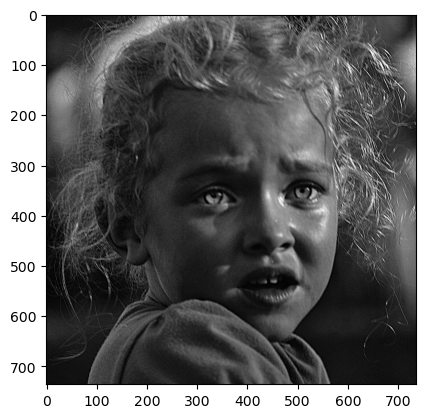

In [178]:
img = cv2.imread('/home/bflserver01/Documents/1stcnn/cnn/s2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [179]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[245.     , 235.     , 228.     ],
        [245.     , 235.     , 228.     ],
        [245.01953, 235.01953, 228.01953],
        ...,
        [252.     , 247.     , 246.     ],
        [251.01172, 246.01172, 245.01172],
        [251.     , 246.     , 245.     ]],

       [[245.     , 235.     , 228.     ],
        [245.     , 235.     , 228.     ],
        [245.01953, 235.01953, 228.01953],
        ...,
        [252.     , 247.     , 246.     ],
        [251.01172, 246.01172, 245.01172],
        [251.     , 246.     , 245.     ]],

       [[245.     , 235.     , 228.     ],
        [245.     , 235.     , 228.     ],
        [245.01953, 235.01953, 228.01953],
        ...,
        [252.     , 247.     , 246.     ],
        [251.01172, 246.01172, 245.01172],
        [251.     , 246.     , 245.     ]],

       ...,

       [[160.99771, 148.99771, 138.99771],
        [160.40921, 148.40921, 138.40921],
        [159.98047, 147.980

In [180]:
np.expand_dims(resize,0)

array([[[[245.     , 235.     , 228.     ],
         [245.     , 235.     , 228.     ],
         [245.01953, 235.01953, 228.01953],
         ...,
         [252.     , 247.     , 246.     ],
         [251.01172, 246.01172, 245.01172],
         [251.     , 246.     , 245.     ]],

        [[245.     , 235.     , 228.     ],
         [245.     , 235.     , 228.     ],
         [245.01953, 235.01953, 228.01953],
         ...,
         [252.     , 247.     , 246.     ],
         [251.01172, 246.01172, 245.01172],
         [251.     , 246.     , 245.     ]],

        [[245.     , 235.     , 228.     ],
         [245.     , 235.     , 228.     ],
         [245.01953, 235.01953, 228.01953],
         ...,
         [252.     , 247.     , 246.     ],
         [251.01172, 246.01172, 245.01172],
         [251.     , 246.     , 245.     ]],

        ...,

        [[160.99771, 148.99771, 138.99771],
         [160.40921, 148.40921, 138.40921],
         [159.98047, 147.98047, 137.98047],
         ...,


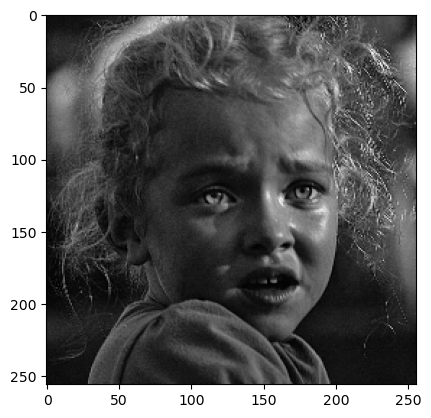

In [181]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [182]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [183]:
yhat

array([[0.9223901]], dtype=float32)

In [184]:
from tensorflow.keras.models import load_model

In [185]:
model.save(os.path.join('/home/bflserver01/Documents/1stcnn/cnn/models','imgclassifyold.h5'))

In [186]:
model.save(os.path.join('models', 'imgclassify.keras'))


In [187]:
import os

save_dir = '/home/bflserver01/Documents/1stcnn/cnn/models'
os.makedirs(save_dir, exist_ok=True)

model.save(os.path.join(save_dir, 'imgclassify.keras'))  # or .h5 if you want


In [188]:
print(os.listdir(save_dir))  # should show ['imgclassify.keras']


['imgclassifyold.h5', 'imgclassify.keras']


In [189]:
newmodel = load_model(os.path.join('/home/bflserver01/Documents/1stcnn/cnn/models','imgclassifyold.h5'))

In [190]:
newmodel.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9223901]], dtype=float32)